In [11]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, mean_absolute_error
from sklearn.decomposition import PCA


In [12]:
# Load data from JSONL file
data = []
with open('table_avec_i.jsonl', 'r') as f:
    for line in f:
        try:
            data.append(json.loads(line.strip()))  # Load each line as a JSON object
        except json.JSONDecodeError as e:
            print(f"Erreur de décodage JSON: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)


In [24]:

# Preview data
print("Aperçu des données :")
print(df.head())

# Descriptive statistics
print("\nStatistiques descriptives :")
print(df.describe())



# Calculate descriptive statistics
df['Emissions per kilogram'].describe()


# Sort products by descending emissions
top_emissions = df.sort_values(by='Emissions per kilogram', ascending=False)
print(top_emissions[['Entity', 'Emissions per kilogram']].head(10))


Aperçu des données :
   ID         Entity  Emissions per kilogram       Type of food  \
0   1            Ale                0.488690           Beverage   
1   2  Almond butter                0.387011          Nut-based   
2   3    Almond milk                0.655888  Dairy-alternative   
3   4        Almonds                0.602368                Nut   
4   5    Apple juice                0.458378           Beverage   

   Quantity per person (g) Origine des produits Mode de production  \
0                      200             Imported       Conventional   
1                       30             Imported       Conventional   
2                      200             Imported       Conventional   
3                       30             Imported       Conventional   
4                      200                Local       Conventional   

  Emissions Category  Cluster  Category_Autre  Category_Végétal  \
0             Faible        0            True             False   
1             Faible 

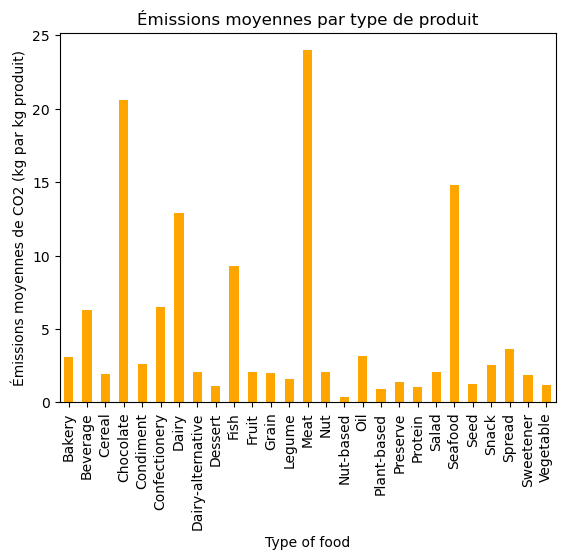

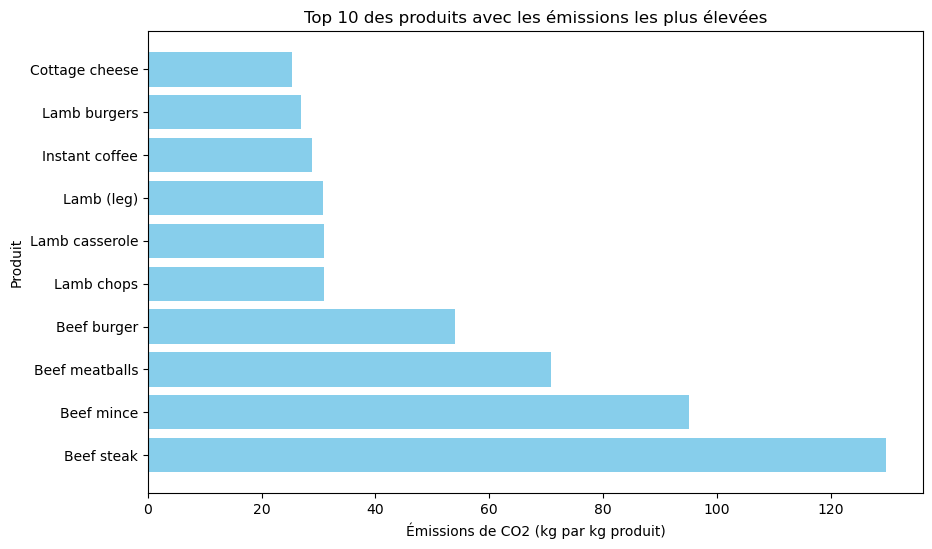

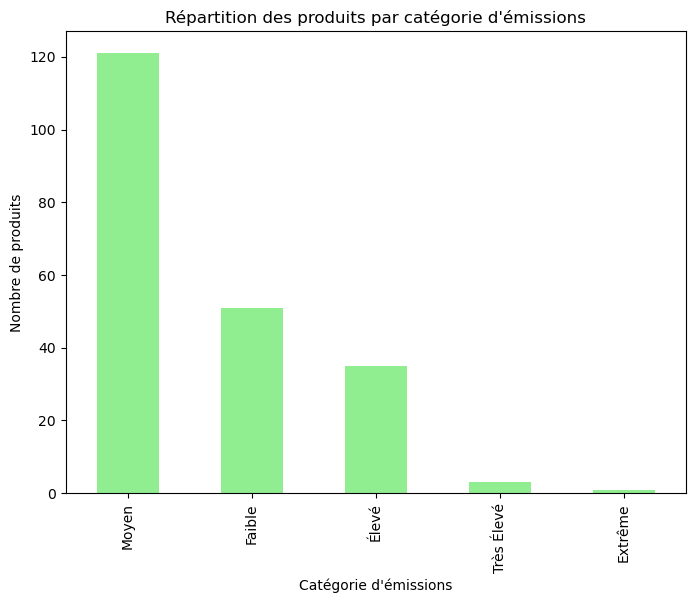

In [28]:

# Sort data by 'Emissions per kilogram'
df_sorted = df.sort_values(by='Emissions per kilogram', ascending=False)

x_positions = range(len(df_sorted))  # Positions on X-axis



# Calculate average emissions by product type
emissions_by_type = df.groupby('Type of food')['Emissions per kilogram'].mean()

# Visualization
emissions_by_type.plot(kind='bar', color='orange')
plt.title('Émissions moyennes par type de produit')
plt.ylabel('Émissions moyennes de CO2 (kg par kg produit)')
plt.show()


# Top 10 most polluting products
top_10 = df.nlargest(10, 'Emissions per kilogram')

plt.figure(figsize=(10, 6))
plt.barh(top_10['Entity'], top_10['Emissions per kilogram'], color='skyblue')
plt.xlabel('Émissions de CO2 (kg par kg produit)')
plt.ylabel('Produit')
plt.title('Top 10 des produits avec les émissions les plus élevées')
plt.show()

# Define categories based on emissions
bins = [0, 1, 10, 50, 100, float('inf')]
labels = ['Faible', 'Moyen', 'Élevé', 'Très Élevé', 'Extrême']
df['Emissions Category'] = pd.cut(df['Emissions per kilogram'], bins=bins, labels=labels)

# Visualize product distribution
plt.figure(figsize=(8, 6))
df['Emissions Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Répartition des produits par catégorie d\'émissions')
plt.xlabel('Catégorie d\'émissions')
plt.ylabel('Nombre de produits')
plt.show()


Coéfficients : [1.]
Intercept : 1.7763568394002505e-15
Colonnes disponibles : Index(['ID', 'Entity', 'Emissions per kilogram', 'Type of food',
       'Quantity per person (g)', 'Origine des produits',
       'Mode de production'],
      dtype='object')
Mean Squared Error: 0.4075117197148636
R² Score: 0.9093557117639158
Cross-validated R²: 0.799


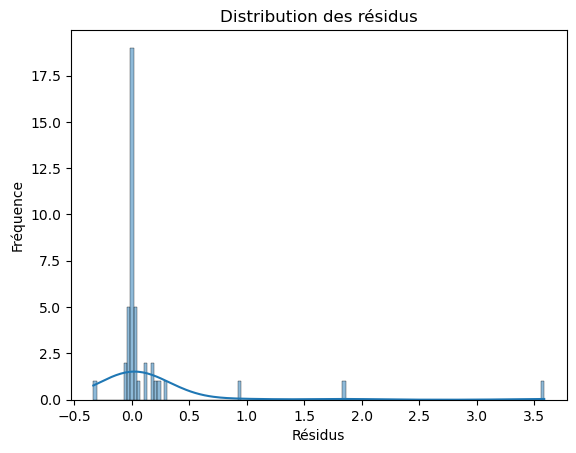

Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best MSE: 0.4801502186652507
Emissions per kilogram             8.981427e-01
Quantity per person (g)            6.116233e-02
Type of food_Meat                  3.450728e-02
Origine des produits_Imported      2.764894e-03
Type of food_Seafood               7.454053e-04
Origine des produits_Local         6.851934e-04
Type of food_Dairy                 6.112972e-04
Type of food_Fish                  5.465513e-04
Type of food_Beverage              3.713045e-04
Type of food_Confectionery         2.365629e-04
Type of food_Bakery                1.452864e-04
Type of food_Fruit                 2.230178e-05
Type of food_Salad                 1.970903e-05
Type of food_Grain                 1.343178e-05
Type of food_Vegetable             8.888155e-06
Type of food_Cereal                4.333472e-06
Type of food_Spread                4.325089e-06
Type of food_Snack                 2.50805

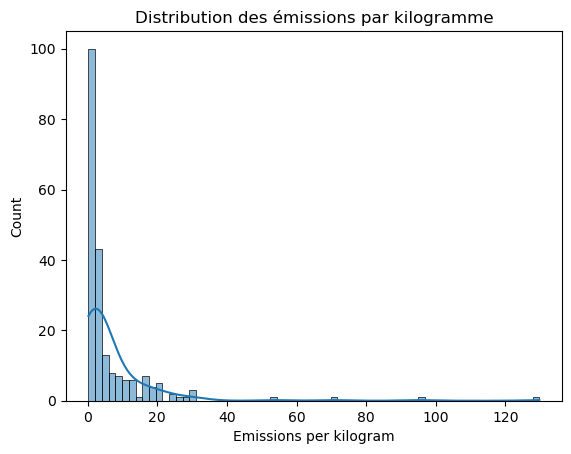

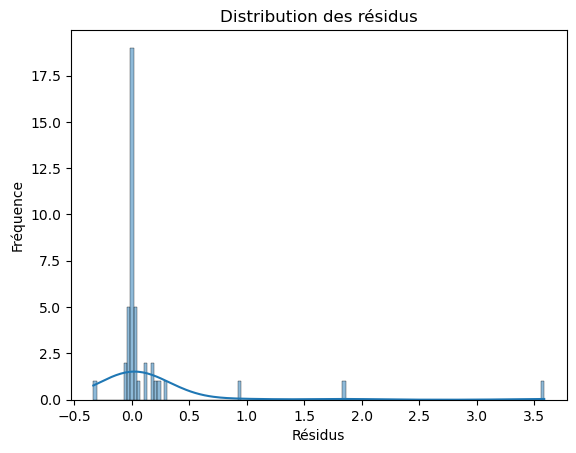

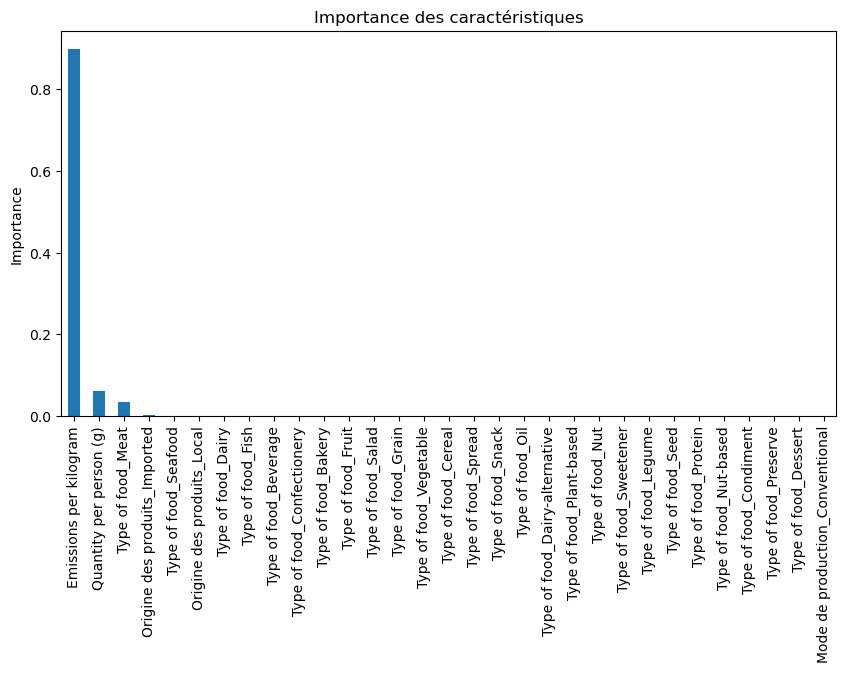

Mean Absolute Error (MAE): 0.198 kg CO2
                     y_pred  Emissions per kilogram
Type of food                                       
Bakery             0.372611                3.105088
Beverage           0.260316                6.309107
Cereal             0.165674                1.913540
Chocolate          0.566204               20.620037
Condiment          0.057547                2.609794
Confectionery      0.385670                6.512029
Dairy              0.672132               12.911568
Dairy-alternative  0.243106                2.100812
Dessert            0.110843                1.087264
Fish               1.277303                9.307648
Fruit              0.225432                2.077887
Grain              0.178081                1.967664
Legume             0.159883                1.588072
Meat               3.412205               23.975178
Nut                0.061755                2.067492
Nut-based          0.016424                0.387011
Oil                0.069

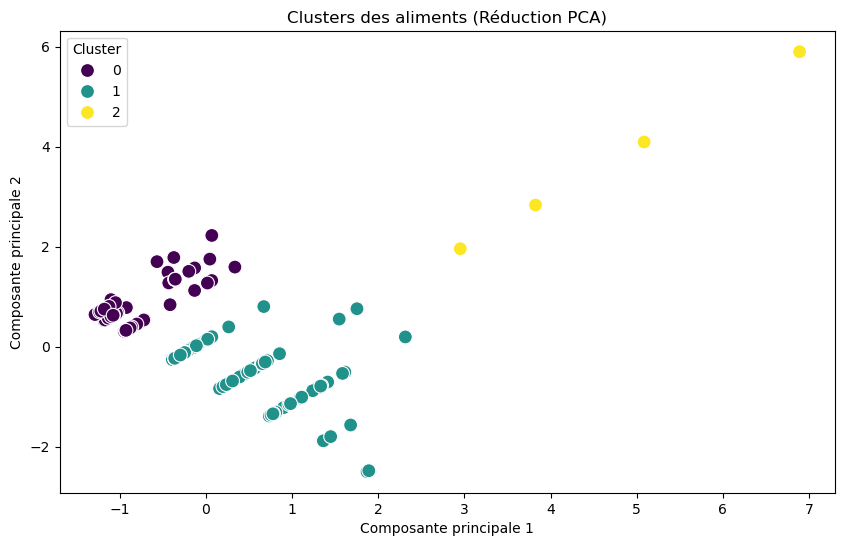

         Emissions per kilogram  Quantity per person (g)
Cluster                                                 
0                      6.698714                36.428571
1                      4.388525               140.145985
2                     87.386533               150.000000


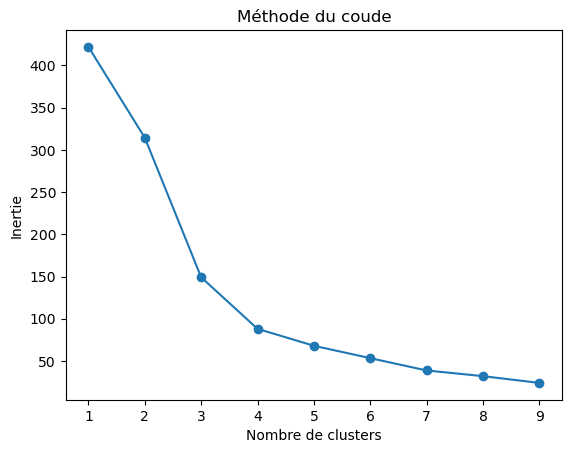

                                 Feature    Importance
30           num__Emissions per kilogram  8.981427e-01
29          num__Quantity per person (g)  6.116233e-02
12                cat__Type of food_Meat  3.450728e-02
26    cat__Origine des produits_Imported  2.764894e-03
20             cat__Type of food_Seafood  7.454053e-04
27       cat__Origine des produits_Local  6.851934e-04
5                cat__Type of food_Dairy  6.112972e-04
8                 cat__Type of food_Fish  5.465513e-04
1             cat__Type of food_Beverage  3.713045e-04
4        cat__Type of food_Confectionery  2.365629e-04
0               cat__Type of food_Bakery  1.452864e-04
9                cat__Type of food_Fruit  2.230178e-05
19               cat__Type of food_Salad  1.970903e-05
10               cat__Type of food_Grain  1.343178e-05
25           cat__Type of food_Vegetable  8.888155e-06
2               cat__Type of food_Cereal  4.333472e-06
23              cat__Type of food_Spread  4.325089e-06
22        

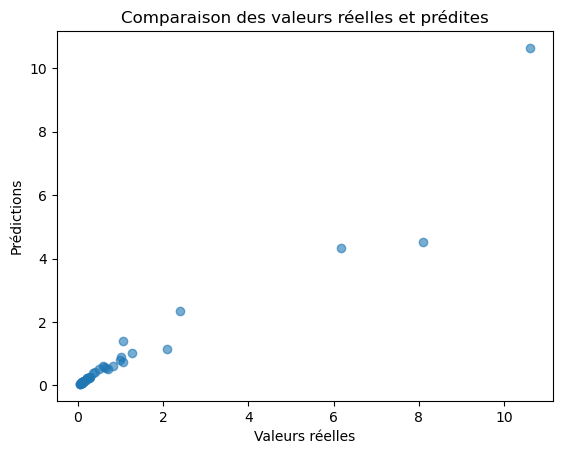

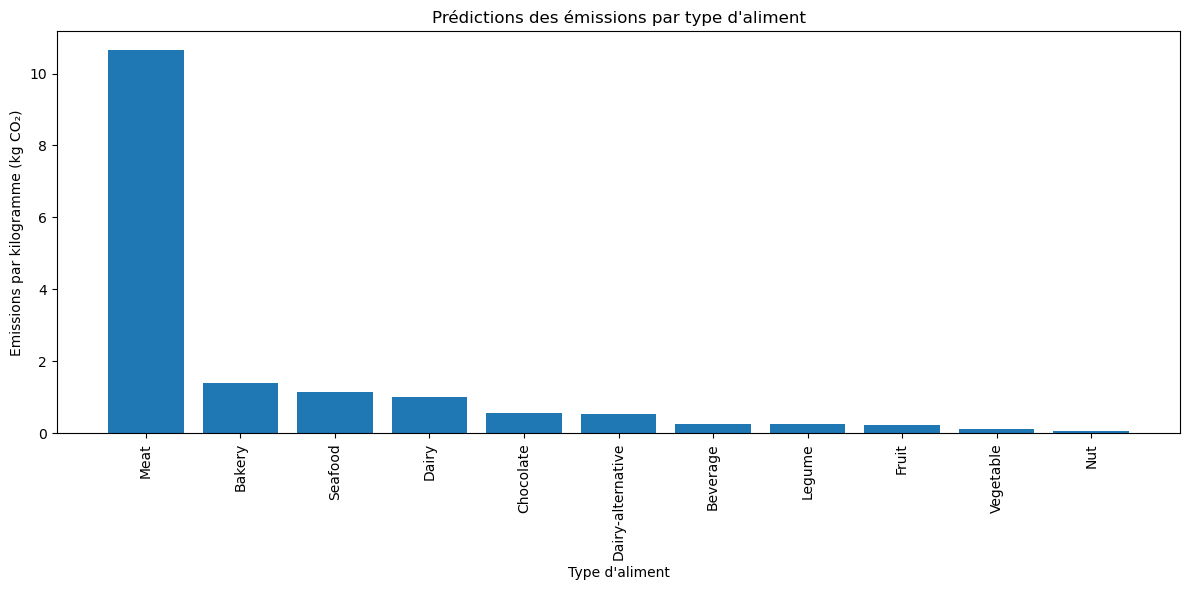

In [30]:
# Encode categories as numerical variables
df = pd.get_dummies(df, columns=['Type of food'], drop_first=True)

# Linear regression model
X = df[['Emissions per kilogram']]
y = df['Emissions per kilogram']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

print(f"Coéfficients : {model.coef_}")
print(f"Intercept : {model.intercept_}")


# Load JSONL data
data = pd.read_json('table_avec_i.jsonl', lines=True)

# Check available columns
print("Colonnes disponibles :", data.columns)

# Define categorical and numerical columns (modify if necessary)
categorical_features = ['Type of food', 'Origine des produits', 'Mode de production']
numeric_features = ['Quantity per person (g)', 'Emissions per kilogram']

# Check if specified columns exist in data
missing_cols = [col for col in (categorical_features + numeric_features) if col not in data.columns]
if missing_cols:
    raise ValueError(f"Les colonnes suivantes sont absentes dans les données : {missing_cols}")

# Prepare preprocessor with unknown category handling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # Handle unknown categories
        ('num', 'passthrough', numeric_features)  # Pass through numerical columns
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Calculate total carbon footprint and define X and y variables
X = data[categorical_features + numeric_features]
y = data['Emissions per kilogram'] * data['Quantity per person (g)'] / 1000  # Total carbon footprint (in kg)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean():.3f}")

# Residuals distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Grid search for hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")

# Feature importances
regressor = model.named_steps['regressor']
feature_names = (model.named_steps['preprocessor']
                 .transformers_[0][1]
                 .get_feature_names_out(categorical_features))
feature_importances = pd.Series(regressor.feature_importances_, index=list(feature_names) + numeric_features)
print(feature_importances.sort_values(ascending=False))

# Cross-validated MSE
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"CV Mean MSE: {-cv_scores.mean()}")

# Standardize numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Describe numerical features
data[['Emissions per kilogram', 'Quantity per person (g)']].describe()

# Emissions per kilogram distribution
sns.histplot(data['Emissions per kilogram'], kde=True)
plt.title('Distribution des émissions par kilogramme')
plt.show()

# Residuals distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Feature importances visualization
feature_names = (model.named_steps['preprocessor']
                 .transformers_[0][1]
                 .get_feature_names_out(categorical_features))
feature_importances = pd.Series(
    model.named_steps['regressor'].feature_importances_,
    index=list(feature_names) + numeric_features
)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Importance des caractéristiques')
plt.ylabel('Importance')
plt.show()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.3f} kg CO2')

# Predicted emissions by food type
data['y_pred'] = model.predict(data[categorical_features + numeric_features])
avg_emissions_by_food_type = data.groupby('Type of food')[['y_pred', 'Emissions per kilogram']].mean()
print(avg_emissions_by_food_type)

# Total predicted carbon footprint
total_emissions = y_pred.sum()
print(f"Empreinte carbone totale prédite : {total_emissions:.2f} kg CO2")

# Load JSONL data
data = pd.read_json('table_avec_i.jsonl', lines=True)

# Relevant variables for clustering
features = ['Emissions per kilogram', 'Quantity per person (g)']

# Check necessary columns
if not all([col in data.columns for col in features]):
    raise ValueError(f"Les colonnes suivantes sont absentes : {[col for col in features if col not in data.columns]}")

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Apply K-Means with initial number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
data['Cluster'] = clusters

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score : {silhouette_avg:.3f}")

# Dimensionality reduction for visualization (PCA in 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Clusters des aliments (Réduction PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Cluster')
plt.show()

# Display statistics by cluster
print(data.groupby('Cluster')[features].mean())

# Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

# Feature importances
importances = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Real vs predicted values comparison
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Comparaison des valeurs réelles et prédites')
plt.show()

# Create DataFrame from predictions
y_pred_df = pd.DataFrame(y_pred, columns=['Emissions per kilogram'], index=X_test['Type of food'])

# Sort predictions in descending order
y_pred_df = y_pred_df.sort_values(by='Emissions per kilogram', ascending=False)

# Visualization with bar chart
plt.figure(figsize=(12, 6))
plt.bar(y_pred_df.index, y_pred_df['Emissions per kilogram'])
plt.xticks(rotation=90)
plt.title("Prédictions des émissions par type d'aliment")
plt.xlabel("Type d'aliment")
plt.ylabel("Emissions par kilogramme (kg CO₂)")
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# Load data
data = pd.read_json('table_avec_i.jsonl', lines=True)

# Define categorical and numerical columns
categorical_features = ['Type of food', 'Origine des produits', 'Mode de production']
numeric_features = ['Quantity per person (g)', 'Emissions per kilogram']

# Prepare preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define X and y
X = data[categorical_features + numeric_features]
y = data['Emissions per kilogram'] * data['Quantity per person (g)'] / 1000  # Total carbon footprint (in kg)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score of the best model: {r2}')

# Export the best model
joblib.dump(best_model, './models/trained_model.pkl')

R² score of the best model: 0.9073903256558286


['./models/trained_model.pkl']